In [5]:
import chainer
import numpy as np
from chainer import cuda,Function,gradient_check,Variable,optimizers,serializers,utils
from chainer import Link,Chain,ChainList
import chainer.functions as F
import chainer.links as L
import csv
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
n_epoch=500
n_node=1024
dataframe = pd.read_csv('../dataset/module.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [8]:
def create_dataset(dataset):
    X, Y = [], []
    for i in range(len(dataset)):
        X.append(dataset[i][:5])
        if i<=9000:
            Y.append(dataset[i][5:6])
        elif i>9000:
            Y.append(dataset[i][6:7])
    X = np.array(X).reshape(len(dataset),5).astype(np.float32)
    Y = np.array(Y).reshape(len(dataset),1).astype(np.float32)
    return X, Y

In [157]:
def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos-1], y[:pos-1]
    testX, testY   = x[pos-1:], y[pos-1:]
    return trainX, trainY, testX, testY

In [158]:
X, Y = create_dataset(dataset)
trainX, trainY, testX, testY = split_data(X, Y, 0.1)

In [159]:
class MyModel (Chain):
    def __init__(self):
        super(MyModel, self).__init__(
            l1=L.Linear(5,n_node),
            l2=L.Linear(None,1),
        )
        
    def __call__(self,x,y):
        return F.mean_squared_error(self.fwd(x), y)

    def fwd(self,x):
         h1 = F.relu(self.l1(x))
         h2 = self.l2(h1)
         return h2

In [160]:
model = MyModel()
optimizer = optimizers.Adam()
optimizer.setup(model)

In [164]:
T=[]
for i in range(n_epoch):
    #print(i,end="")
    x = Variable(trainX)
    y = Variable(trainY)
    model.zerograds()
    loss = model(x,y)
    loss.backward()
    T.append(loss.data)
    #print(loss.data)
    optimizer.update()

KeyboardInterrupt: 

In [162]:
train_loss=loss
test_loss=0
xt=Variable(testX)
yt=model.fwd(xt)
ans=yt.data
test_loss=F.mean_squared_error(ans, testY)
print("train_loss={},test_loss={}".format(train_loss.data,test_loss.data))

train_loss=852783232.0,test_loss=1322674304.0


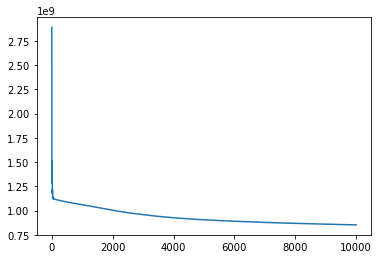

In [163]:
x = np.arange(0, n_epoch)
y = T
plt.plot(x,y)
plt.show()